In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
# !wget -O dataset.csv https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [4]:
# !head -3 dataset.csv

In [5]:
df = pd.read_csv('iris.csv', names=[
  "sepal length in cm",
  "sepal width in cm",
  "petal length in cm",
  "petal width in cm",
  "class"
])

In [6]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = df[["sepal length in cm",
  "sepal width in cm",
  "petal length in cm",
  "petal width in cm"
]].values.astype(np.float32)
X.shape

(150, 4)

In [8]:
y = pd.factorize(df['class'])[0]
y.shape

(150,)

In [9]:
X = np.hstack((np.ones((len(X), 1)), X))

In [10]:
m, n = X.shape
K = 3
K, m, n

(3, 150, 5)

In [11]:
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

In [12]:
np.random.seed(0)
theta = np.random.random((n, K))

In [13]:
def softmax(z):
    z -= np.max(z)
    return np.exp(z) / np.sum(np.exp(z))

In [14]:
def h(X, theta):
  return softmax(X @ theta)

In [15]:
def J(preds, y):
  return np.sum(- np.log(preds[np.arange(m), y]))

In [16]:
def T(y, K):
  """ one hot encoding """
  one_hot = np.zeros((len(y), K))
  one_hot[np.arange(len(y)), y] = 1
  return one_hot

In [17]:
def compute_gradient(theta, X, y):
  preds = h(X, theta)
  gradient = 1/m * X.T @ (preds - T(y, K))
  return gradient

In [18]:
hist = {'loss': [], 'acc': []}
alpha = 1e-3

for i in range(1500):
  gradient = compute_gradient(theta, X, y)
  theta -= alpha * gradient

  # loss
  preds = h(X, theta)
  loss = J(preds, y)
  hist['loss'].append(loss)

  # acc
  c = 0
  for j in range(len(y)):
    if np.argmax(h(X[j], theta)) == y[j]:
      c += 1
  acc = c / len(y)
  hist['acc'].append(acc)

  # print stats
  if i % 200 == 0: print('{:.2f} {:.2f}%'.format(loss, acc * 100))

1145.40 20.67%
1119.38 34.00%
1097.88 49.33%
1080.74 58.67%
1067.77 60.67%
1058.76 63.33%
1053.44 64.67%
1051.54 68.67%


Text(0.5, 0, 'accuracy')

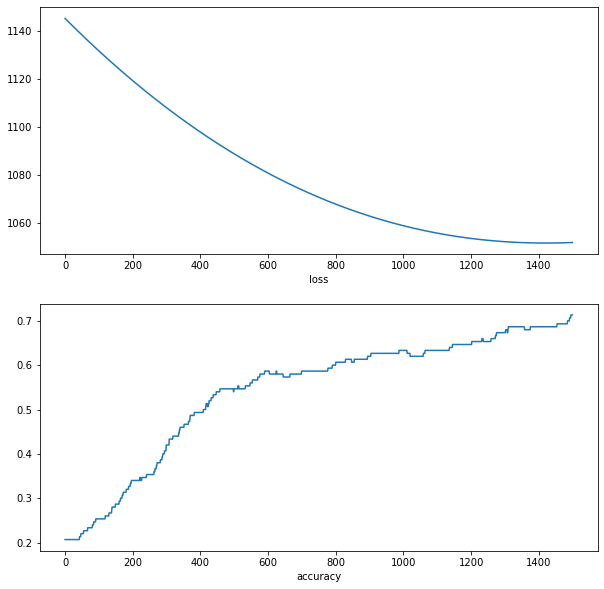

In [19]:
figsize(10, 10)
subplot(2, 1, 1)
plot(hist['loss'])
xlabel('loss')
subplot(2, 1, 2)
plot(hist['acc'])
xlabel('accuracy')

## Graphics

The rest of the notebook is not directly related to the concept. This section just shows how I generate graphics for the blog post.

(100,)


C:\Users\USER\AppData\Local\Temp/ipykernel_1368/183565995.py:4: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


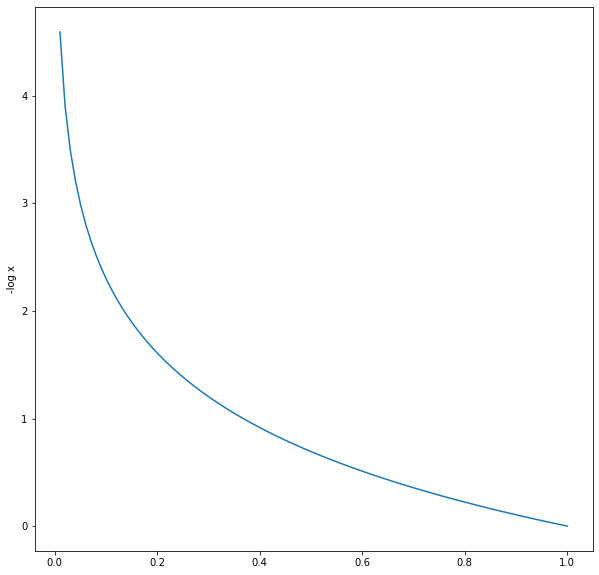

In [20]:
# error for $log 0$
x = np.linspace(0, 1, 100)
print(x.shape)
y = -np.log(x)
plot(x, y)
ylabel('-log x')
show()

---

By [Rick Wierenga](https://twitter.com/rickwierenga/)